In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
all_files = [file for file in os.listdir('./Sales/SalesAnalysis/Sales_Data')]
all_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
sales_data = pd.DataFrame() # create an empty dataframe

In [4]:
for each_file in all_files:
    df = pd.read_csv('./Sales/SalesAnalysis/Sales_Data/'+each_file)
    sales_data = pd.concat([sales_data,df]) # concatenates vertically by default
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
sales_data.to_csv('AllSalesData.csv',index=False) # can use this file now every time all the sales data is required.

In [6]:
sales_data = pd.read_csv('AllSalesData.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
sales_data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [9]:
sales_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [10]:
sales_data.isnull().any(axis=1) # across columns if it finds any Nan, returns true for such index

0         False
1          True
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [11]:
sales_data[sales_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
sales_data.dropna(how='all',inplace=True)

In [13]:
# since we merged files the headers of the files are going to be duplicated as data in rows.
sales_data[sales_data['Order Date']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
sales_data = sales_data[sales_data['Order Date']!='Order Date']

### Q1: what was the best month for sales? how much was earned in that month?

In [15]:
#create a sales column first
# the given quantities and prices are object type. convert them to numbers to perform calculations
sales_data.loc[:,('Quantity Ordered')] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data.loc[:,('Price Each')] = pd.to_numeric(sales_data['Price Each'])

sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [16]:
sales_data['Total Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [17]:
# create a month column from order date to find sales by month 
sales_data['Month'] = pd.to_numeric(sales_data['Order Date'].str[0:2])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [18]:
result_set = sales_data.groupby(sales_data['Month']).sum()
result_set

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


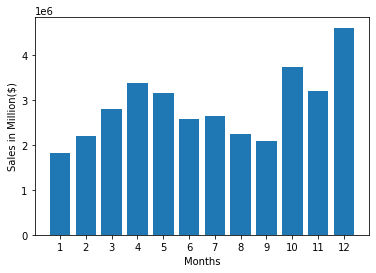

In [19]:
Months = range(1,13)
plt.bar(Months,'Total Sales',data=result_set) # what do you want to represent and define the height
plt.xticks(Months)
plt.xlabel('Months')
plt.ylabel('Sales in Million($)')
plt.show()

In [20]:
# from the above graph december is the month with highest sales and the sales value from the table is approximately 4.6M
# the sales might be higher because december is a holiday season and people tend to buy gifts etc.

### Q2: Which city sold the most products?

In [21]:
# create a city/state column. we need to extract city name from the purchase address. We need a function that can do this. 
# Use apply() to implement the created function on a dataframe column
# since there can be duplicated city names, pick city as well as state
sales_data['City/State'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA


In [22]:
city_data = sales_data.groupby(sales_data['City/State']).sum()
city_data

,Quantity Ordered,Price Each,Total Sales,Month
City/State,,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06,104794
Austin TX,11153,1.809874e+06,1.819582e+06,69829
Boston MA,22528,3.637410e+06,3.661642e+06,141112
Dallas TX,16730,2.752628e+06,2.767975e+06,104620
Los Angeles CA,33289,5.421435e+06,5.452571e+06,208325
New York City NY,27932,4.635371e+06,4.664317e+06,175741
Portland ME,2750,4.471893e+05,4.497583e+05,17144
Portland OR,11303,1.860558e+06,1.870732e+06,70621
San Francisco CA,50239,8.211462e+06,8.262204e+06,315520


In [23]:
cities = list(city_data.index)
cities

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

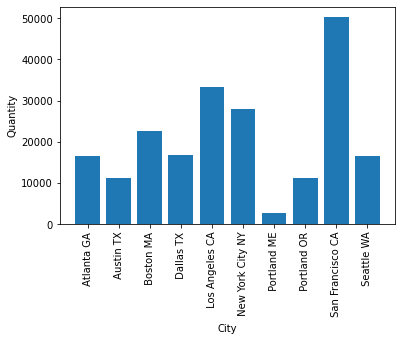

In [40]:
plt.bar(cities,'Quantity Ordered',data=city_data)
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('City')
plt.ylabel('Quantity')
plt.show()

In [25]:
# San Francisco sold the highest quantity of items at 50239 units.
# can draw conclusions based on certain questions: Is it because of the Silicon Valley and the presence of tech industries, is it because the salaries are comparitively higher that is causing such spending?

### Q3: At what time of the day can we do advertising to attract more customers into buying products?

In [32]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9


In [27]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [28]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Total Sales       185950 non-null  float64       
 7   Month             185950 non-null  int64         
 8   City/State        185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [29]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9


In [30]:
ad_hours = sales_data.groupby(sales_data['Hour']).count()
ad_hours

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [33]:
Hours = list(ad_hours.index)
Hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

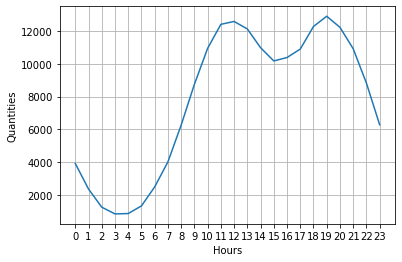

In [42]:
plt.plot(Hours,'Quantity Ordered',data=ad_hours) # line plot since we have to show the trend of sales over hours
plt.xticks(Hours,size=10)
plt.xlabel('Hours')
plt.ylabel('Quantities')
plt.grid()
plt.show()

In [43]:
# I would recommend advertsing at around 12pm or 7pm as more sales are happening around that time. 
# This may be due to lunch or after work hours.

### Q4: Which combination of products were the most preferred by the customers?

In [86]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9


In [87]:
# we can see the products that a customer is buying together, by checking the rows with same order id.
freq_data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
freq_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston MA,11


In [88]:
# now we can group by the same order id's and combine the products for that order id together using transform.
# https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705
freq_data['Prod Together'] = freq_data.groupby(freq_data['Order ID'])['Product'].transform(lambda x: ','.join(x))
freq_data.head()

<ipython-input-88-88a474b84073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_data['Prod Together'] = freq_data.groupby(freq_data['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour,Prod Together
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [89]:
# now remove duplicate values from above dataframe
combos = freq_data[['Order ID','Prod Together']].drop_duplicates()
combos.head()

,Order ID,Prod Together
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [93]:
# to find the number of times the above products are bought together
from itertools import combinations
from collections import Counter

count = Counter()

for row in combos['Prod Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [94]:
# from the above list, it's clear that iphone - lightning charging cable is the most frequently bought combination.
# the other top frequent combinations are also shown.
# from the above info offers can be put on those combinations for business advantage.

### Q5: what product was sold the most?

In [95]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,City/State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9


In [101]:
quant_sold = sales_data.groupby(sales_data['Product']).sum() # sums all the numeric values in the grouped dataframes
quant_sold

,Quantity Ordered,Price Each,Total Sales,Month,Hour
Product,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815


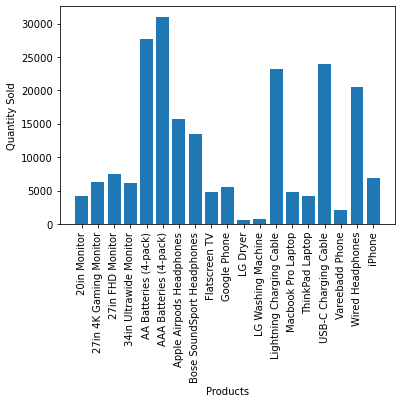

In [104]:
products = list(quant_sold.index)
plt.bar(products,'Quantity Ordered',data=quant_sold)
plt.xticks(products,rotation='vertical',size=10)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()

In [105]:
# from the above we can see that AAA and AA type batteries were the most sold. washing machines, dryers are the least sold.
# This might be because of the pricing of the products.

In [108]:
prices = sales_data.groupby(sales_data['Product'])['Price Each'].mean()

<ipython-input-112-193d31e199aa>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=10)


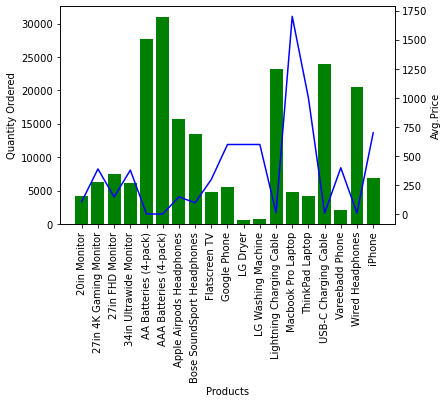

In [112]:
# plotting the prices and quantities together for products to see if there is a relationship
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,'Quantity Ordered',data=quant_sold,color='g')
ax2.plot(products,prices,color='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Avg.Price')
ax1.set_xticklabels(products,rotation='vertical',size=10)
plt.show()

In [ ]:
# observation from the above is that with high prices the quantitu sold is less and vice versa, with some exceptions